<a href="https://colab.research.google.com/github/Leksandretta/inno_arch/blob/main/ml_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загрузка дата сета из Открытых данных Правительства Москвы
from google.colab import files
uploaded = files.upload()

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Чтение первых пяти строк
path = ('/content/dataTRAIN.csv')
train = pd.read_csv(path)
train.head(5)

,id,status,contract,completed,notcompleted,name,INN,SB,government
0,2612803258,1,55,55,0,общество с ограниченной ответственностью между...,7727591609,1,0
1,2612803260,0,7,3,4,общество с ограниченной ответственностью квест,7720426250,0,0
2,2612803262,0,5,2,3,общество с ограниченной ответственностью корпо...,5053046400,1,0
3,2612803263,0,1,0,1,общество с ограниченной ответственностью медко...,1657136391,1,0
4,2612803264,0,1,0,1,общество с ограниченной ответственностью кбк с...,7709911486,0,0


In [3]:
train = pd.read_csv('/content/dataTRAIN.csv', on_bad_lines='skip')

In [4]:
#Общая информация по данным
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            949 non-null    int64 
 1   status        949 non-null    int64 
 2   contract      949 non-null    int64 
 3   completed     949 non-null    int64 
 4   notcompleted  949 non-null    int64 
 5   name          949 non-null    object
 6   INN           949 non-null    int64 
 7   SB            949 non-null    int64 
 8   government    949 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 66.9+ KB


In [5]:
# Статистика по всем данным
train.describe(include='all')

,id,status,contract,completed,notcompleted,name,INN,SB,government
count,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949,9.490000e+02,949.000000,949.000000
unique,NaN,NaN,NaN,NaN,NaN,941,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,общество с ограниченной ответственностью альянс,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
mean,2.612804e+09,0.931507,34.256059,33.505796,0.740780,NaN,7.194908e+09,0.728135,0.011591
std,5.355525e+02,0.252723,20.794169,20.358527,1.399304,NaN,1.587496e+09,0.445155,0.107093
min,2.612803e+09,0.000000,1.000000,0.000000,0.000000,NaN,2.640657e+08,0.000000,0.000000
25%,2.612804e+09,1.000000,15.000000,15.000000,0.000000,NaN,7.604287e+09,0.000000,0.000000
50%,2.612804e+09,1.000000,34.000000,34.000000,0.000000,NaN,7.718797e+09,1.000000,0.000000
75%,2.612805e+09,1.000000,53.000000,53.000000,1.000000,NaN,7.729545e+09,1.000000,0.000000


<Axes: xlabel='SubjectOfSmallBusiness', ylabel='count'>

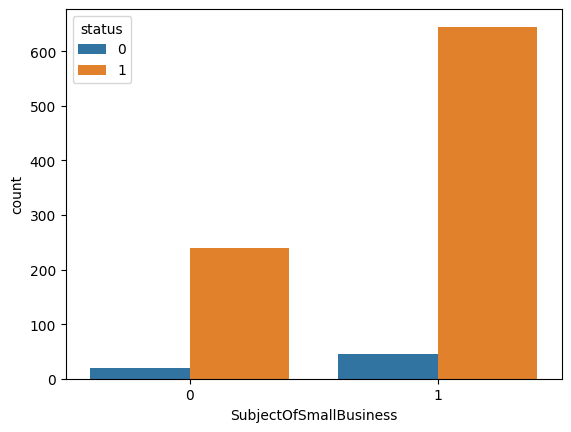

In [ ]:
# Какие предприятия чаще оказываются ненадежными? Результат: субъекты МСП
sns.countplot(x = 'SubjectOfSmallBusiness', hue = 'status', data = train)

<Axes: xlabel='government', ylabel='count'>

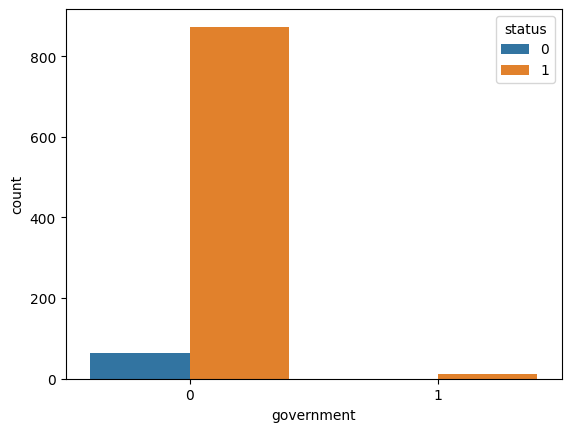

In [ ]:
# Какие предприятия чаще оказываются ненадежными? Результат: негосударственные компании
sns.countplot(x = 'government', hue = 'status', data = train)

In [ ]:
# Отбор признаков для ML
train.drop(['Name', 'INN', 'global_id'], axis = 1, inplace = True)
train.head(3)

,status,Contract,completed,notСompleted,SubjectOfSmallBusiness,government
0,1,55,55,0,1,0
1,0,7,3,4,0,0
2,0,5,2,3,1,0


In [ ]:
# выделение целевой переменной
X_train = train.drop('status', axis = 1)
y_train = train['status']

In [ ]:
X_train.head(3)

,Contract,completed,notСompleted,SubjectOfSmallBusiness,government
0,55,55,0,1,0
1,7,3,4,0,0
2,5,2,3,1,0


In [ ]:
# обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# прогноз на обучающей выборке
y_pred_train = model.predict(X_train)

In [ ]:
# сравнение прогнозных значений с фактическими
conf_matrix = confusion_matrix(y_train, y_pred_train)
conf_matrix_train = pd.DataFrame(conf_matrix)
conf_matrix_train
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Прогноз ненадежный ', 'Прогноз надежный'], index = ['Факт ненадежный', 'Факт надежный'])
conf_matrix_labels

,Прогноз ненадежный,Прогноз надежный
Факт ненадежный,65,0
Факт надежный,4,880


In [ ]:
# % прогноза
model_accuracy = accuracy_score(y_train, y_pred_train)
round(model_accuracy, 3)

0.996

In [ ]:
path2 = ('/content/dataTEST.csv')
X_test = pd.read_csv(path2, sep=";")
X_test.head(5)

,global_id,Contract,completed,notСompleted,Name,INN,SubjectOfSmallBusiness,government
0,2612805108,6,6,0,ООО КОНВЕНТ АРТ,7713669622,1,0
1,2612805109,19,19,0,ООО СИСТЕМА01,9710036230,1,0
2,2612805113,18,18,0,Общество с ограниченной ответственностью РУСБИ...,7720816204,1,0
3,2612805117,25,25,0,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ТОРГО...,7722351995,1,0
4,2612805120,28,28,0,ОБЩЕСТВО С ОГРАНИЧЕННОЙ\nОТВЕТСТВЕННОСТЬЮ\nМЕД...,7731623155,0,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   global_id               101 non-null    int64 
 1   Contract                101 non-null    int64 
 2   completed               101 non-null    int64 
 3   notСompleted            101 non-null    int64 
 4   Name                    101 non-null    object
 5   INN                     101 non-null    int64 
 6   SubjectOfSmallBusiness  101 non-null    int64 
 7   government              101 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.4+ KB


In [ ]:
X_test.drop(['Name', 'INN', 'global_id'], axis = 1, inplace = True)
X_test.head(3)

,Contract,completed,notСompleted,SubjectOfSmallBusiness,government
0,6,6,0,1,0
1,19,19,0,1,0
2,18,18,0,1,0


In [ ]:
X_test.columns = X_test.columns.map(str)

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
y_pred_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])